In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
from scipy.stats import pearsonr
from scipy import stats

In [ ]:
!wget https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P6-donnees.zip

--2023-12-10 17:44:31--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P6-donnees.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.85.107, 52.92.19.64, 52.218.96.106, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.85.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13345644 (13M) [application/zip]
Saving to: ‘DAN-P6-donnees.zip’

DAN-P6-donnees.zip  100%[===================>]  12.73M  12.1MB/s    in 1.1s    

2023-12-10 17:44:32 (12.1 MB/s) - ‘DAN-P6-donnees.zip’ saved [13345644/13345644]



In [ ]:
!unzip DAN-P6-donnees.zip

Archive:  DAN-P6-donnees.zip
   creating: DAN-P6-donnees/
  inflating: __MACOSX/._DAN-P6-donnees  
  inflating: DAN-P6-donnees/customers.csv  
  inflating: __MACOSX/DAN-P6-donnees/._customers.csv  
  inflating: DAN-P6-donnees/products.csv  
  inflating: __MACOSX/DAN-P6-donnees/._products.csv  
  inflating: DAN-P6-donnees/transactions.csv  
  inflating: __MACOSX/DAN-P6-donnees/._transactions.csv  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_customers = pd.read_csv('/content/DAN-P6-donnees/customers.csv')
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [ ]:
df_products = pd.read_csv('/content/DAN-P6-donnees/products.csv')
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
df_transactions = pd.read_csv('/content/DAN-P6-donnees/transactions.csv')
df_transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [ ]:

# On constate que la colonne date a le type 'object', il faut donc le modifier au format date

df_transactions['date'].str.len()

0         26
1         26
2         26
3         26
4         26
          ..
679527    26
679528    26
679529    26
679530    26
679531    26
Name: date, Length: 679532, dtype: int64

In [ ]:
# Je souhaite trouver les valeurs de la colonne 'date' qui sont plus ou moins longues que 26, la longueur normale.
# Je voudrais maintenant supprimer 'T_0	test_' de chaque ligne qui comporte ces éléments afin d'avoir les lignes au format normal.
# Je vais devoir demander à sélectionner les lignes qui ne comporte pas les str ='T_0	test_'. Je veux donc obtenir le contraire de ce dataframe

df_transactions_errors = df_transactions.loc[df_transactions['date'].str.len() != 26]
df_transactions_errors

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [ ]:
# Je souhaite trouver les valeurs de la colonne 'date' qui sont plus ou moins longues que 26, la longueur normale.
# df_transactions_correct = df_transactions.loc[~df_transactions['date'].str.len() != 26]
df_transactions_correct = df_transactions.loc[df_transactions['date'].str.len() == 26]
df_transactions_correct

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [ ]:
df1 = pd.merge(df_transactions_correct, df_customers)
df2 = pd.merge(df1, df_products)
df2

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0
...,...,...,...,...,...,...,...,...
679106,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945,35.24,1
679107,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945,35.24,1
679108,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945,35.24,1
679109,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993,86.99,2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   sex         679111 non-null  object 
 5   birth       679111 non-null  int64  
 6   price       679111 non-null  float64
 7   categ       679111 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 46.6+ MB


In [ ]:
df2['price'].sum()

11853728.680000002

In [ ]:
# Avant de pouvoir mettre en avant l'évolution du chiffre d'affaire dans le temps, il va falloir classer les dates de la plus ancienne à la plus récente.
# Il faut commencer par s'assurer que les dates sont au format datetime. Ce n'est pas le cas. On les converti donc
# La colonne date du dataframe df2 suit ce format de date 2022-05-20 13:21:29.043970


df2['date'] = pd.to_datetime(df2['date'], format="%Y-%m-%d %H:%M:%S.%f")

In [ ]:
# On trie les dates de la plus ancienne à la plus récente.
df2_sorted = df2.sort_values(by=['date'])

In [ ]:
# Test
# On souhaite définir la colonne date en index

df2_sorted.set_index(['date'], inplace=True)
df2_sorted

,id_prod,session_id,client_id,sex,birth,price,categ
date,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0
...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1


In [ ]:
# On a déjà calculé les moyennes mobiles avant, sur l'ensemble des données. On va maintenant calculer la moyenne des moyenne mobiles lorsqu'on va utiliser la fonction resample.
# Il nous faut maintenant réduire la quantité de données à afficher afin de ne pas surcharger les graphiques.
# On va donc utiliser la fonction resample pour aggréger les données correspondant à un même jour.
# Nous allons utiliser la fonction resample pour retenir un seul type de données chaque jour (en utilisant 'D').

df2_sorted_resampled = df2_sorted.resample('D').sum()
df2_sorted_resampled.head(10)


# Renommer la colonne "price" en CA ?

<ipython-input-20-1bcf2f3b7cf1>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_sorted_resampled = df2_sorted.resample('D').sum()


,birth,price,categ
date,,,
2021-03-01,1902351,16565.22,427
2021-03-02,1857005,15486.45,362
2021-03-03,1801708,15198.69,360
2021-03-04,1785123,15196.07,383
2021-03-05,1865533,17471.37,433
2021-03-06,1899959,15785.28,386
2021-03-07,1789292,14760.20,339
2021-03-08,1836206,15679.53,377
2021-03-09,1884085,15710.51,358


In [ ]:
# On souhaite obtenir l'évolution temporelle du chiffre d'affaire, représenté par moyenne mobile
df2_sorted_resampled['moyenne mobile'] = df2_sorted_resampled['price'].rolling(window=7).mean()
df2_sorted_resampled

,birth,price,categ,moyenne mobile
date,,,,
2021-03-01,1902351,16565.22,427,NaN
2021-03-02,1857005,15486.45,362,NaN
2021-03-03,1801708,15198.69,360,NaN
2021-03-04,1785123,15196.07,383,NaN
2021-03-05,1865533,17471.37,433,NaN
...,...,...,...,...
2023-02-24,1767989,15207.89,365,16488.778571
2023-02-25,1790355,15761.25,493,16006.747143
2023-02-26,1759258,16304.72,435,16035.021429


<Axes: xlabel='date'>

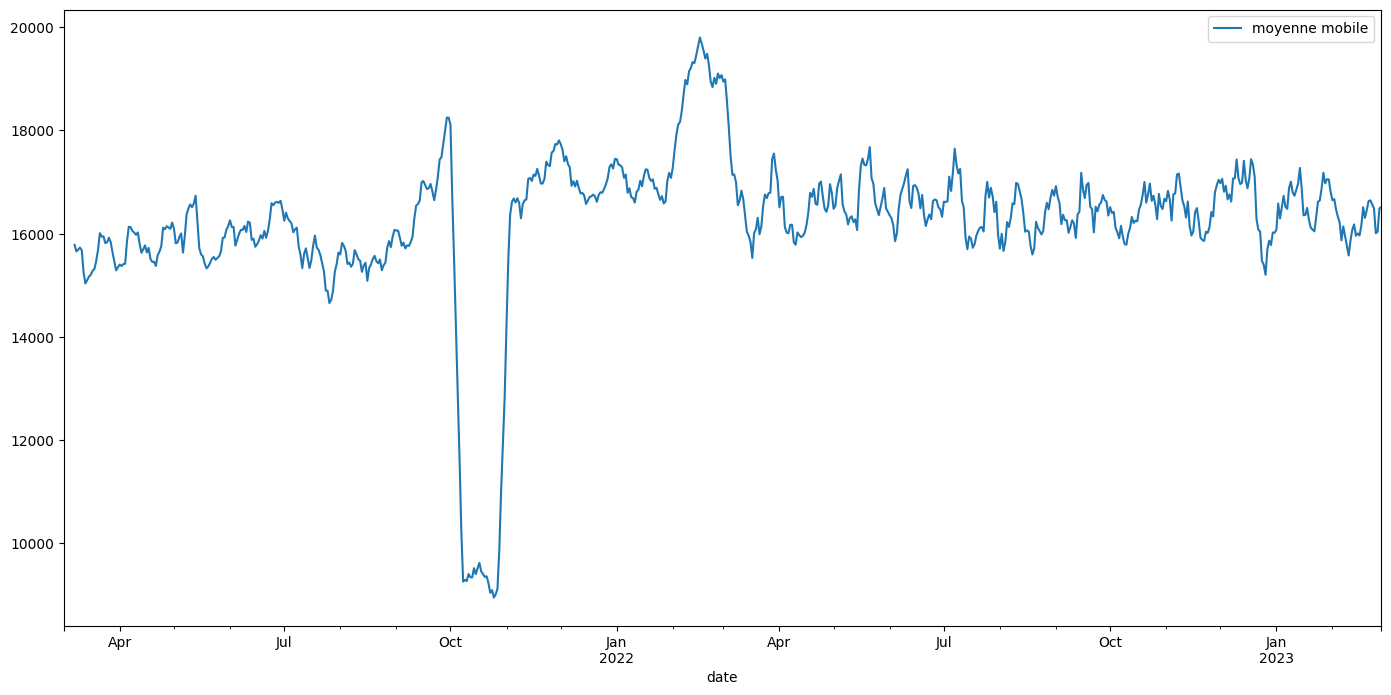

In [ ]:
# Représentation graphique de l'évolution du CA, par moyenne mobile.
# La moyenne mobile permet de dégager des tendances de fonds dans le temps.

df2_sorted_resampled['moyenne mobile'].plot(kind='line', figsize=(17,8), legend='bool')




In [ ]:
# On souhaite savoir pourquoi il y a eu une chute des ventes en octobre. On a besoin de faire une analyse par catégorie à cette période.

In [ ]:
# On souhaite analyser le top 5 des clients.

In [ ]:
# On souhaite maintenant étudier les tops des produits vendus

df_top_ventes = df2_sorted.groupby('id_prod').agg({'price': 'count'}).sort_values(by = ['price'], ascending=False)
df_top_ventes.head(10)


,price
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
1_403,1960
1_412,1951
1_413,1945
1_406,1939


In [ ]:
# On souhaite maintenant étudier les flops des produits vendus

df_flop_ventes = df2_sorted.groupby('id_prod').agg({'price': 'count'}).sort_values(by = ['price'], ascending=True)
df_flop_ventes.head(10)

,price
id_prod,
0_2201,1
0_1601,1
0_549,1
2_81,1
0_807,1
0_1683,1
0_1151,1
0_1633,1
0_833,1


In [ ]:
# On souhaite maintenant étudier les produits vendus générant le plus de CA

df_top_CA = df2_sorted.groupby('id_prod').agg({'price': 'sum'}).sort_values(by = ['price'], ascending=False)
df_top_CA.head(10)

,price
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


In [ ]:
# On souhaite maintenant étudier les produits vendus générant le moins de CA

df_flop_CA = df2_sorted.groupby('id_prod').agg({'price': 'sum'}).sort_values(by = ['price'], ascending=True)
df_flop_CA.head(10)

,price
id_prod,
0_1539,0.99
0_1284,1.38
0_1653,1.98
0_1601,1.99
0_807,1.99
0_541,1.99
0_1728,2.27
0_1498,2.48
0_898,2.54


In [ ]:
# On souhaite maintenant étudier les CA réalisés auprès des hommes (analyse par catégorie)

df_homme = df2_sorted[df2_sorted['sex'] == 'm']
df_homme_categ = df_homme.groupby("categ")["sex", "price"].sum()
df_homme_categ

<ipython-input-29-cb20b4c0be5d>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_homme_categ = df_homme.groupby("categ")["sex", "price"].sum()
<ipython-input-29-cb20b4c0be5d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_homme_categ = df_homme.groupby("categ")["sex", "price"].sum()


,price
categ,
0,2229717.90
1,2295305.67
2,1469021.98


In [ ]:
# On réinitialise l'index pour pouvoir faire apparaître la colonne "categ" dans le graphique.

df_homme_categ.reset_index(inplace=True)
df_homme_categ

,categ,price
0,0,2229717.90
1,1,2295305.67
2,2,1469021.98


In [ ]:
df_homme['price'].sum()

5994045.55

In [ ]:
# On souhaite maintenant étudier les CA réalisés auprès des femmes (analyse par catégorie)

df_femme = df2_sorted[df2_sorted['sex'] == 'f']
df_femme_categ = df_femme.groupby("categ")["sex", "price"].sum()
df_femme_categ

<ipython-input-32-0535987b7ad1>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_femme_categ = df_femme.groupby("categ")["sex", "price"].sum()
<ipython-input-32-0535987b7ad1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_femme_categ = df_femme.groupby("categ")["sex", "price"].sum()


,price
categ,
0,2190013.07
1,2358417.02
2,1311253.04


In [ ]:
df_femme_categ.reset_index(inplace=True)
df_femme_categ

,categ,price
0,0,2190013.07
1,1,2358417.02
2,2,1311253.04


In [ ]:
df_homme_categ

,categ,price
0,0,2229717.90
1,1,2295305.67
2,2,1469021.98


In [ ]:
df_femme['price'].sum()


5859683.130000002

In [ ]:
# On souhaite connaître la répartition du chiffre d'affaire par tranche d'âge (à faire : calculer l'âge des individus à partir de la date de naissance)

CA_by_age = df2_sorted.groupby(['birth']).agg({'price':'sum'})
CA_by_age['Année actuelle'] = 2023
CA_by_age

,price,Année actuelle
birth,,
1929,3221.85,2023
1930,4013.87,2023
1931,2815.45,2023
1932,5043.19,2023
1933,5254.35,2023
...,...,...
2000,165007.98,2023
2001,178497.70,2023
2002,184177.35,2023


<Axes: xlabel='birth'>

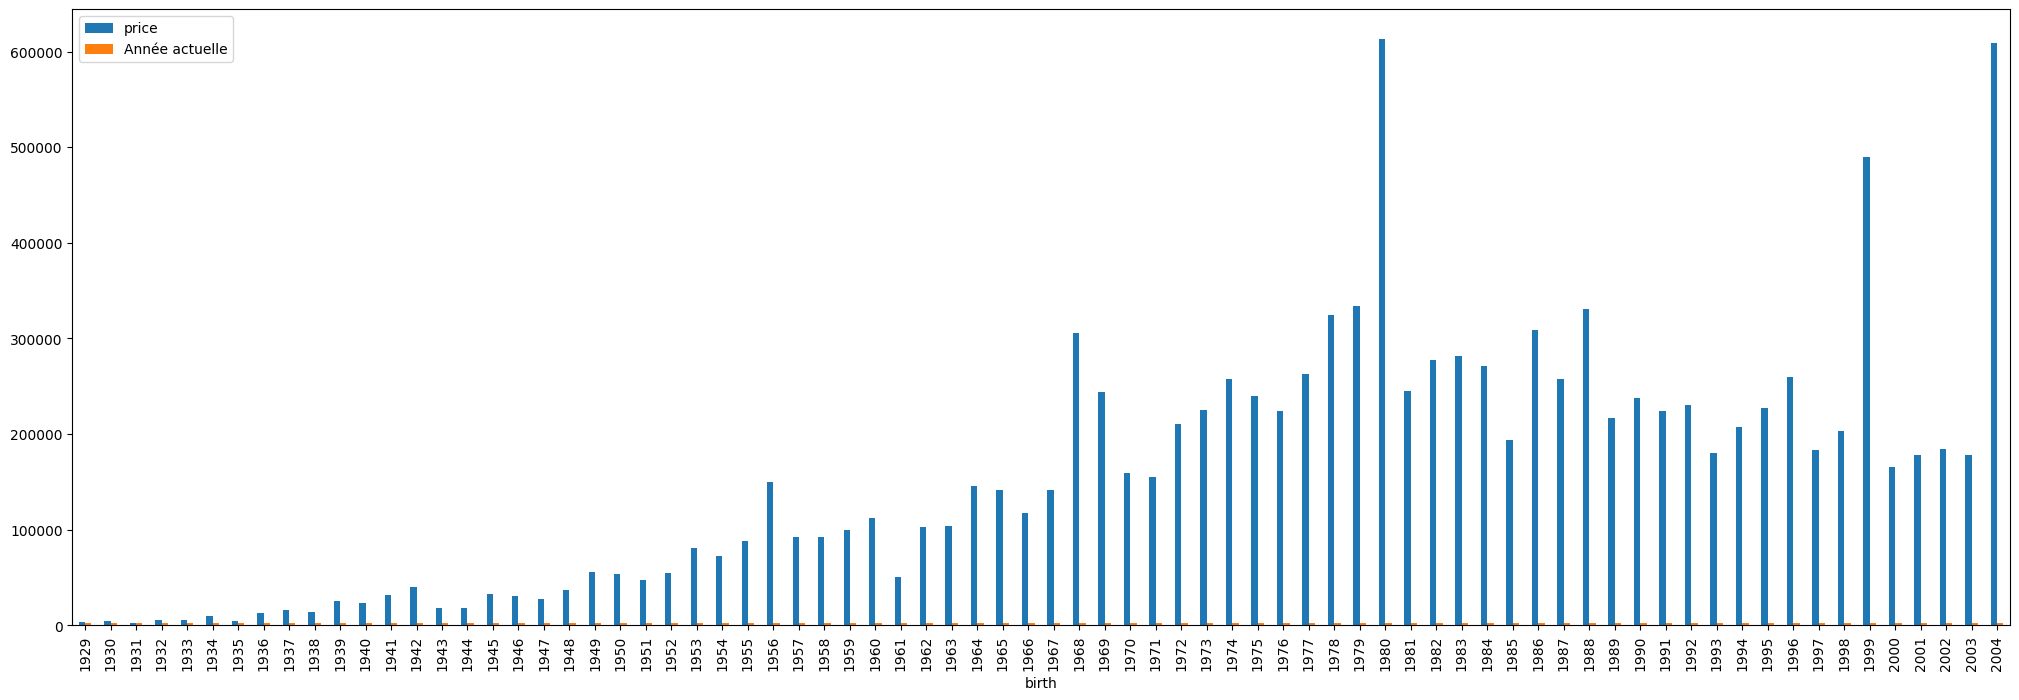

In [ ]:
CA_by_age.plot.bar(figsize=(25,8))

# Si les données représentées sont toujours des dates de naissance, alors les invidus les plus jeunes sont à droites du graphiques et les plus vieux à gauche
# Si les données représentées ont été converti en age. Alors les  individus les plus jeunes sont à gauche et les plus vieux à droite.

In [ ]:
# Afin d'afficher un nuage de point pour le graphique des catégories d'age, nous créeons des listes, que nous utiliserons en paramètre pour notre graphique.

df2_CA_age_liste = df2_sorted['birth'].tolist()
df2_CA_price_liste = df2_sorted['price'].tolist()

Text(0.5, 1.0, "Répartition du chiffre d'affaire en fonction de l'année de naissance")

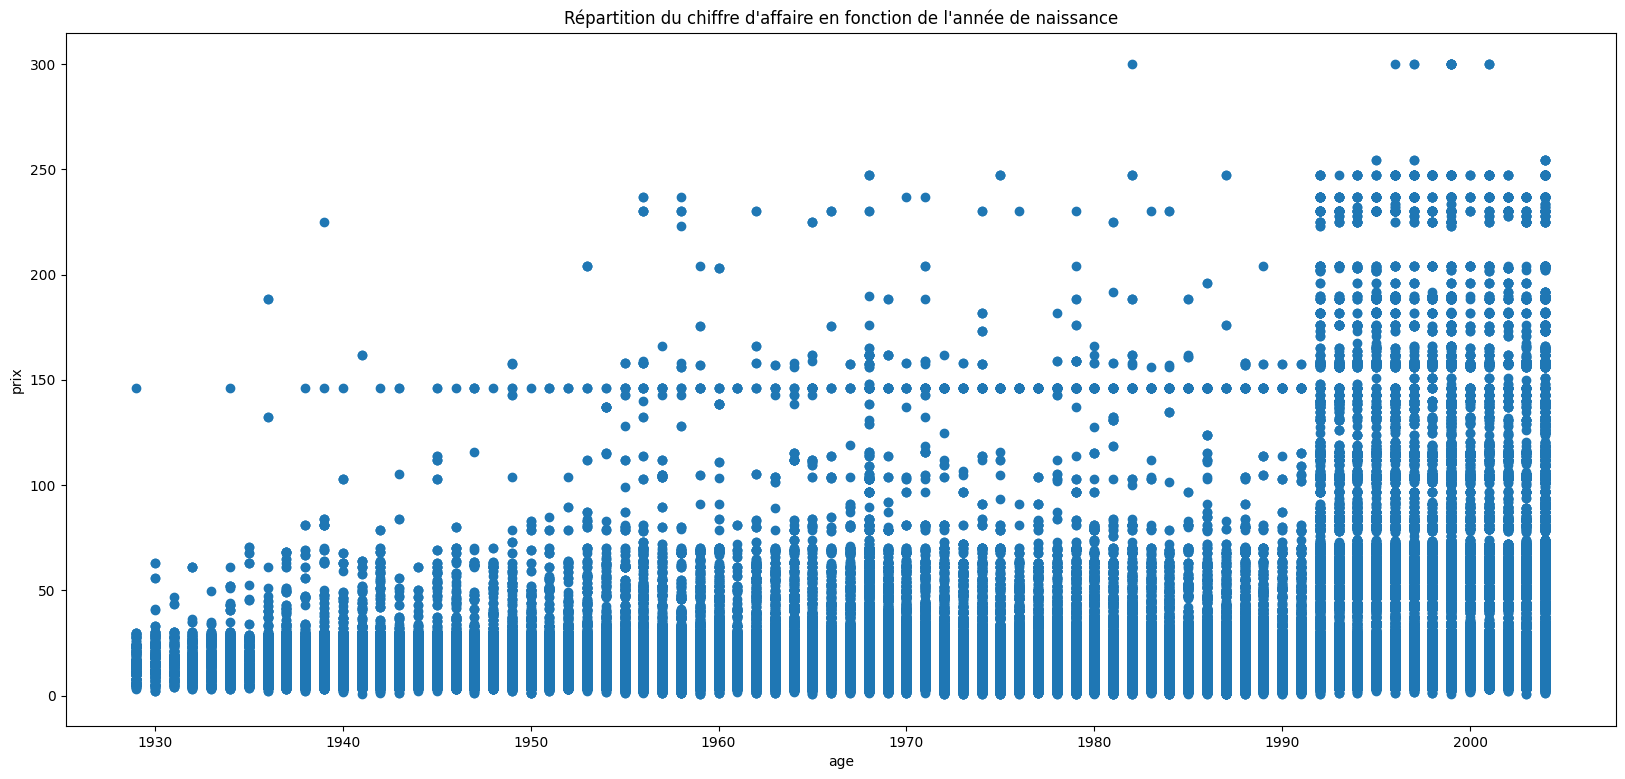

In [ ]:
plt.figure(figsize=(20, 9))
plt.scatter(df2_CA_age_liste, df2_CA_price_liste)
plt.xlabel('age')
plt.ylabel('prix')
plt.title("Répartition du chiffre d'affaire en fonction de l'année de naissance")

In [ ]:
# Afficher les tranches d'âge par panier moyen. (graphique scatterplot : axe panier moyen et un axe tranche ds'âge);
# On commence par calculer la moyenne des CA pour chaque année de naissance.

df2_CA_panier_moyen = df2_sorted.groupby('birth')['birth','price'].mean()
df2_CA_panier_moyen



<ipython-input-40-57f9dd85b2ed>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_CA_panier_moyen = df2_sorted.groupby('birth')['birth','price'].mean()


,birth,price
birth,,
1929,1929.0,16.029104
1930,1930.0,17.760487
1931,1931.0,16.561471
1932,1932.0,16.216045
1933,1933.0,16.117638
...,...,...
2000,2000.0,37.391339
2001,2001.0,41.979704
2002,2002.0,40.178305


In [ ]:
# A partir de ce dataframe, on va créer une liste pour les âges et une liste pour les prix.

df2_CA_age_panier_moyen = df2_CA_panier_moyen['birth'].tolist()
df2_CA_prix_panier_moyen = df2_CA_panier_moyen['price'].tolist()

Text(0.5, 1.0, 'Panier moyen par année de naissance')

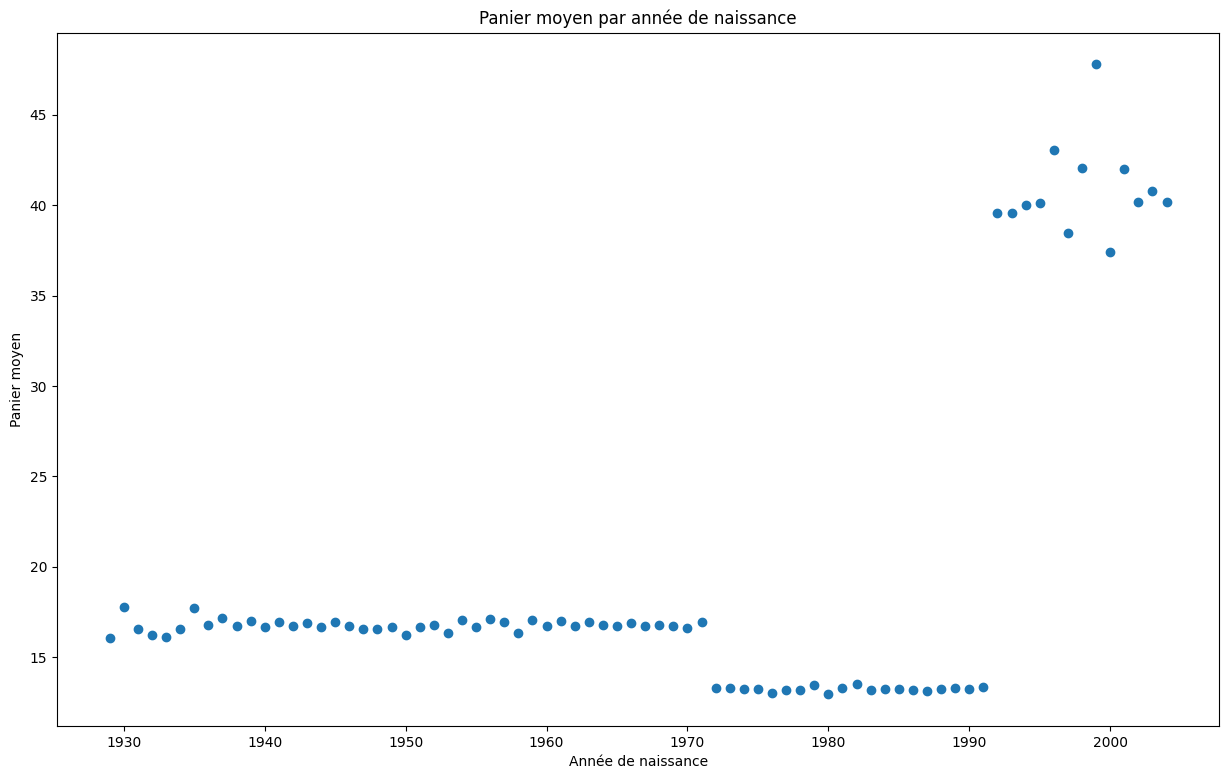

In [ ]:
# Ensuite, on crée le graphique.

plt.figure(figsize=(15,9))
plt.scatter(df2_CA_age_panier_moyen, df2_CA_prix_panier_moyen)
plt.xlabel('Année de naissance')
plt.ylabel('Panier moyen')
plt.title('Panier moyen par année de naissance')

In [ ]:
len(CA_by_age)

76

In [ ]:
# Pour chaque quintile, on cherche à connaître la ligne du dataframe qui correspond, afin de pouvoir définir la portion qui correspond à ce quintile.

premier_quintile_borne = 0.20*len(CA_by_age)
print(premier_quintile_borne)
deuxieme_quintile_borne = 0.40*len(CA_by_age)
print(deuxieme_quintile_borne)
troisieme_quintile_borne = 0.60*len(CA_by_age)
print(troisieme_quintile_borne)
quatrieme_quintile_borne = 0.80*len(CA_by_age)
print(quatrieme_quintile_borne)
cinquieme_quintile_borne = len(CA_by_age)
print(cinquieme_quintile_borne)


15.200000000000001
30.400000000000002
45.6
60.800000000000004
76


In [ ]:
# On souhaite maintenant représenter la répartition du chiffre d'affaire via une courbe de Lorenz.
# Pour sélectionner les lignes de chaque quintile (ex: de la ligne 16 à 30), nous avons fait la sélection suivante : CA_by_age[15:30]. Rappel : La première ligne comprise dans le bornage ([15:30]), est exclue de la sélection. le bornage suivant sélectionne donc des lignes 16 à 30.
# Nous allons répartir les résultats en 5 quintiles, puis  Nous reprenons notre dataframe CA_by_age qui contient déjà les chiffres d'affaire par date de naissance.
# Il sera alors possible de savoir quelle décile représente le plus gros chiffre d'affaire (et donc quelle catégorie d'âge consomme le plus), en calculant la somme des CA pour chaque décile
# Ici, la portion qui correspond au premier quintile est [:15]. Ce qui signifie, toutes les lignes jusqu'à la 15ème.

premier_quintile = CA_by_age[:15].sum()/CA_by_age.sum()
deuxieme_quintile = CA_by_age[:30].sum()/CA_by_age.sum()
troisieme_quintile = CA_by_age[:46].sum()/CA_by_age.sum()
quatrieme_quintile = CA_by_age[:61].sum()/CA_by_age.sum()
cinquieme_quintile = CA_by_age[:76].sum()/CA_by_age.sum()

# Ici, nous souhaitons connaître quelle part du CA, chaque quintile représente.

print(premier_quintile)
print(deuxieme_quintile)
print(troisieme_quintile)
print(quatrieme_quintile)
print(cinquieme_quintile)




price             0.018123
Année actuelle    0.197368
dtype: float64
price             0.096736
Année actuelle    0.394737
dtype: float64
price             0.313428
Année actuelle    0.605263
dtype: float64
price             0.683112
Année actuelle    0.802632
dtype: float64
price             1.0
Année actuelle    1.0
dtype: float64


In [ ]:
# Les résultats ci-dessus représente la part de CA comprise dans chaque quintile.

In [ ]:
# Ici, nous calculons le chiffre d'affaire total, par quintile.

premier_quintile_CA = CA_by_age[:15].sum()
deuxieme_quintile_CA = CA_by_age[16:30].sum()
troisieme_quintile_CA = CA_by_age[30:46].sum()
quatrieme_quintile_CA = CA_by_age[46:61].sum()
cinquieme_quintile_CA = CA_by_age[61:76].sum()

print(premier_quintile_CA)
print(deuxieme_quintile_CA)
print(troisieme_quintile_CA)
print(quatrieme_quintile_CA)
print(cinquieme_quintile_CA)

price             214827.3
Année actuelle     30345.0
dtype: float64
price             914011.35
Année actuelle     28322.00
dtype: float64
price             2568613.06
Année actuelle      32368.00
dtype: float64
price             4382133.83
Année actuelle      30345.00
dtype: float64
price             3756304.26
Année actuelle      30345.00
dtype: float64


In [ ]:
# On calcule maintenant les chiffres d'affaire cumulés fin de pouvoir afficher les valeurs correspondantes dans le graphique.

premier_quintile_CA_cum = premier_quintile_CA
deuxieme_quintile_CA_cum = premier_quintile_CA + deuxieme_quintile_CA
troisieme_quintile_CA_cum = premier_quintile_CA + deuxieme_quintile_CA + troisieme_quintile_CA
quatrieme_quintile_CA_cum = premier_quintile_CA + deuxieme_quintile_CA + troisieme_quintile_CA + quatrieme_quintile_CA
cinquieme_quintile_CA_cum = premier_quintile_CA + deuxieme_quintile_CA + troisieme_quintile_CA + quatrieme_quintile_CA + cinquieme_quintile_CA

print(premier_quintile_CA_cum)
print(deuxieme_quintile_CA_cum)
print(troisieme_quintile_CA_cum)
print(quatrieme_quintile_CA_cum)
print(cinquieme_quintile_CA_cum)

price             214827.3
Année actuelle     30345.0
dtype: float64
price             1128838.65
Année actuelle      58667.00
dtype: float64
price             3697451.71
Année actuelle      91035.00
dtype: float64
price             8079585.54
Année actuelle     121380.00
dtype: float64
price             11835889.8
Année actuelle      151725.0
dtype: float64


In [ ]:
# Pour plus de simpliciter nous allons reporter les résultatsdans des variables.

premier_quintile_CA_cum = 214827.3
deuxieme_quintile_CA_cum = 1128838.65
troisieme_quintile_CA_cum = 3697451.71
quatrieme_quintile_CA_cum = 8079585.54
cinquieme_quintile_CA_cum = 11835889.8

In [ ]:
# Calcul des valeurs pour tracer la droite réprésentant une répartition égale du chiffre d'affaire

# cinquieme_quintile_CA_cum = 11835889.8 (total)

# 0_pourcent = 11835889.8*0
# 20_pourcent = 11835889.8*0.2
# 40_pourcent = 11835889.8*0.4
# 60_pourcent = 11835889.8*0.6
# 80_pourcent = 11835889.8*0.8
# 100_pourcent = 11835889.8*1


In [ ]:
# A partir de ces variables, on peut maintenant tracer la courbe de Gini.

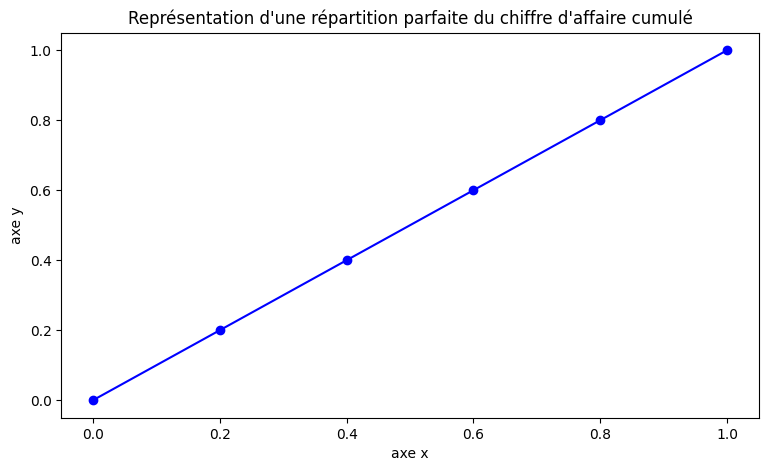

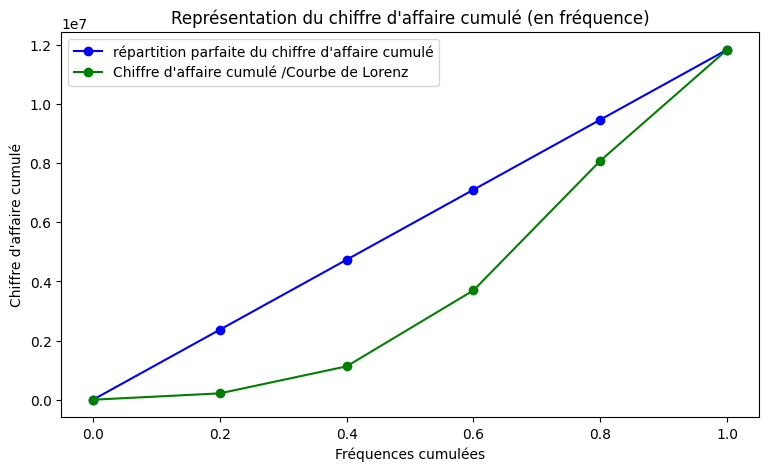

In [ ]:
# Ce graphique représente une courbe de lorenz


valeurs_axe_x = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
valeurs_courbe_lorenz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

plt.figure(figsize = (9, 5))
plt.xlabel("axe x")
plt.ylabel("axe y")
plt.plot( valeurs_axe_x, valeurs_courbe_lorenz, '-o', c="blue", label="répartition parfaite du chiffre d'affaire cumulé")
plt.title("Représentation d'une répartition parfaite du chiffre d'affaire cumulé")

# Ce graphique représente un aperçu de la répartition du chiffre d'affaire cumulé avec à côté une courbe de Lorenz.

valeurs_axe_x = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
valeurs_frequence_cum_CA = [0, premier_quintile_CA_cum, deuxieme_quintile_CA_cum, troisieme_quintile_CA_cum, quatrieme_quintile_CA_cum, cinquieme_quintile_CA_cum]
valeurs_courbe_lorenz = [0, 11835889.8*0.2, 11835889.8*0.4, 11835889.8*0.6, 11835889.8*0.8, 11835889.8*1]







plt.figure(figsize = (9, 5))
plt.xlabel("Fréquences cumulées")
plt.ylabel("Chiffre d'affaire cumulé")
plt.plot(valeurs_axe_x, valeurs_courbe_lorenz, '-o', c="blue", label="répartition parfaite du chiffre d'affaire cumulé")
plt.plot(valeurs_axe_x, valeurs_frequence_cum_CA, '-o', c="green", label="Chiffre d'affaire cumulé /Courbe de Lorenz")
plt.title("Représentation du chiffre d'affaire cumulé (en fréquence)")
plt.legend()
plt.savefig("Représentation graphique de la répartition du chiffre d'affaire de la librairie.png")

# Note : Ajouter plt.show() si le graphique n'est pas créé sous jupyter notebook, sinon il ne s'affichera pas.
# Note : On a sauvegardé notre graphique via plt.savefig(""). Elle s'affiche dans le répertoire de travail jupyter.

### Nous nous occupons maintenant des tâches demandées par Julie

* Chercher le lien entre de corrélation entre :
* Le genre d'un client et les catégories de livres qu'il achète.
* L'âge des clients et la catégorie de livres achetés.
* L'âge des clients et le montant total des achats.
* L'âge des clients et la fréquence des achats.
* L'âge des clients et la taille du panier moyen.

In [ ]:
df2_correlation_sorted = df2_sorted[['birth', 'price', 'sex', 'categ' ]]
df2_correlation_sorted

,birth,price,sex,categ
date,,,,
2021-03-01 00:01:07.843138,1967,11.99,f,0
2021-03-01 00:02:26.047414,1960,19.37,m,0
2021-03-01 00:02:38.311413,1988,4.50,m,0
2021-03-01 00:04:54.559692,1989,6.55,f,0
2021-03-01 00:05:18.801198,1956,16.49,f,0
...,...,...,...,...
2023-02-28 23:49:03.148402,1996,21.92,f,1
2023-02-28 23:51:29.318531,1994,48.99,f,2
2023-02-28 23:53:18.929676,1985,26.99,f,1


<ipython-input-54-2947386ce23b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2_correlation_sorted.corr(),annot = True)


<Axes: >

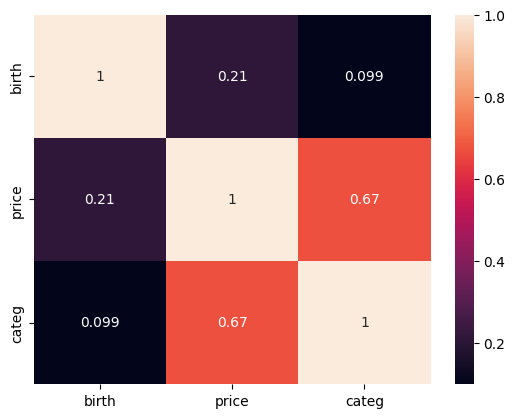

In [ ]:
# Nous utiliserons une heatmap pour mettre en avant les liens de corrélation entre variable (Via l'utilisation de seaborn)
# Par défaut, le test de corrélation utilisé par la méthode ".corr()" est le test de Pearson.

sns.heatmap(df2_correlation_sorted.corr(),annot = True)

Il n'y a pas de lien entre l'année de naissance et les variables catégories de livre.
Il y a une corrélation importante entre la catégorie de livre acheté et son prix

Note : la catégorie "sex" ne semble pas avoir été pris en compte car il s'agit d'une variable non numérique.

In [ ]:
# # Nous souhaitons pouvoir connaître les préférences de chaque sexe pour chaque catégorie de livre. Nous affichons une vue d'ensemble.

df2_sorted_categ = df2_sorted.groupby(["sex", "categ"])["id_prod", "session_id",	"client_id", "birth", "price",	"categ"].sum()
df2_sorted_categ

<ipython-input-55-47d2d741dd05>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_sorted_categ = df2_sorted.groupby(["sex", "categ"])["id_prod", "session_id",	"client_id", "birth", "price",	"categ"].sum()
<ipython-input-55-47d2d741dd05>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_sorted_categ = df2_sorted.groupby(["sex", "categ"])["id_prod", "session_id",	"client_id", "birth", "price",	"categ"].sum()


birth       price   categ
sex categ                               
f   0      407618687  2190013.07       0
    1      226768996  2358417.02  114899
    2       34486995  1311253.04   34566
m   0      414201822  2229717.90       0
    1      221741838  2295305.67  112270
    2       38334969  1469021.98   38400

#Rappel sur le contenu du dataframe à étudier.

In [ ]:
df2_sorted

,id_prod,session_id,client_id,sex,birth,price,categ
date,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0
...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1


In [ ]:
df_homme


,id_prod,session_id,client_id,sex,birth,price,categ
date,,,,,,,
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0
2021-03-01 00:07:04.371179,0_1304,s_7,c_1609,m,1980,5.86,0
2021-03-01 00:09:11.523122,1_445,s_8,c_7991,m,1968,23.99,1
2021-03-01 00:10:20.265265,1_556,s_9,c_6171,m,1983,24.47,1
...,...,...,...,...,...,...,...
2023-02-28 23:33:19.977604,2_43,s_348437,c_2737,m,1998,69.99,2
2023-02-28 23:34:26.678331,1_592,s_348439,c_3957,m,1945,23.68,1
2023-02-28 23:35:42.827156,1_436,s_348441,c_6878,m,1950,11.76,1


In [ ]:
df_femme

,id_prod,session_id,client_id,sex,birth,price,categ
date,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0
2021-03-01 00:05:44.999018,0_1073,s_6,c_4908,f,1981,13.99,0
2021-03-01 00:07:48.507530,0_279,s_6,c_4908,f,1981,16.99,0
...,...,...,...,...,...,...,...
2023-02-28 23:48:53.349647,1_366,s_348443,c_4999,f,1972,28.54,1
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2


On reprend notre tableau des chiffres d'affaire totaux pour les prochains test.

In [ ]:
CA_by_age.reset_index(inplace=True)
CA_by_age

,birth,price,Année actuelle
0,1929,3221.85,2023
1,1930,4013.87,2023
2,1931,2815.45,2023
3,1932,5043.19,2023
4,1933,5254.35,2023
...,...,...,...
71,2000,165007.98,2023
72,2001,178497.70,2023
73,2002,184177.35,2023
74,2003,178195.78,2023


Calcul de l'âge des individus.

In [ ]:
CA_by_age['Age'] = CA_by_age['Année actuelle'] - CA_by_age['birth']
CA_by_age

,birth,price,Année actuelle,Age
0,1929,3221.85,2023,94
1,1930,4013.87,2023,93
2,1931,2815.45,2023,92
3,1932,5043.19,2023,91
4,1933,5254.35,2023,90
...,...,...,...,...
71,2000,165007.98,2023,23
72,2001,178497.70,2023,22
73,2002,184177.35,2023,21
74,2003,178195.78,2023,20


##TEST STATISTIQUES

#Etude de la relation entre le genre et la catégorie de livre : Test du Khi - 2

In [ ]:
# Test du khi2
# Analyse de contingence : Le test du chi carré permet d'évaluer l'association entre deux variables catégorielles. Par exemple, vous pouvez utiliser ce test pour déterminer si le genre d'une personne est indépendant de sa préférence de musique (variables catégorielles : genre, préférence musicale).
# En général, le test du chi carré est utilisé lorsque les variables d'intérêt sont catégorielles et que nous souhaitons évaluer les relations entre les catégories ou vérifier si les fréquences observées diffèrent de manière significative des fréquences attendues.

from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df2_sorted.sex, df2_sorted.categ))

# note : si la p-value est < à 0.05, alors les variables sont dépendantes l'une de l'autre (il y a corrélation)

Chi2ContingencyResult(statistic=147.11906816131497, pvalue=1.1310980597090762e-32, dof=2, expected_freq=array([[206952.24759281, 113159.50583189,  18173.2465753 ],
       [208506.75240719, 114009.49416811,  18309.7534247 ]]))

On constate une p-value de 1.1310980597090762e-32. --> Ce qui est inférieur au seuil de 0.05 %.
Il y a donc une corrélation entre le genre et la catégorie de livre acheté.

#Etude du lien entre l'âge des clients et le montant total d'achat : test de Spearman


Certains tests, tels que le test t de Student, l'analyse de variance (ANOVA) ou la régression linéaire, supposent l'homogénéité des variances entre les groupes comparés. On le vérifie donc avec le test de bartlett.

#Test d'homogénéité : Test de bartlett

In [ ]:

scipy.stats.bartlett(df_homme['price'],df_femme['price'])

# utiliser test de shapiro, pearson ou bartlet

# si age utilisé en variable quantitative --> test de pearson


BartlettResult(statistic=796.7797126910164, pvalue=2.705274308243717e-175)

La pvalue de ces deux groupes étant inférieur à 0.05% (résultat : pvalue=2.705274308243717e-175), on en conclut que ces 2 groupes ne sont pas homogènes au niveau de la variance.(autrement dit, les variances sont différentes).

On peut alors écarter les tests t de student, Anova ou de régression linéaire.

Les données n'étant pas homogènes, je vais plutôt utiliser le test de spearman

Utilisation : Le test de corrélation de Spearman est utilisé lorsque les variables peuvent ne pas être linéairement corrélées ou lorsque les données ne suivent pas une distribution normale. Il évalue la corrélation monotone entre les variables.

#Test statistique : Test de Spearman

In [ ]:
# Nous avons souhaité étudier la corrélation entre l'âge et le montant d'achat.
# Le test de corrélation de spearman a besoin de deux variables.

correlation_age_montant, p_value = stats.spearmanr(CA_by_age['Age'], CA_by_age['price'])

# Affichage des résultats
print("Test de corrélation de Spearman")
print("Coefficient de corrélation :", correlation_age_montant)
print("p-value :", p_value)

Test de corrélation de Spearman
Coefficient de corrélation : -0.8576076555023923
p-value : 4.57972879340901e-23


Le test de corrélation de spearman est fortement négatif. Autrement dit, plus on vieillit, moins le montant total d'achat est important.

La p-value étant inférieur à 0.05, cela signifie que le test est significatif.

#Etude du lien  entre l'âge des clients et la taille du panier moyen : Test de Spearman

### 1) On commence par vérifier si les données suivent une loi normale avec le test de Shapiro-Wilk
Note : Le test de Shapiro-Wilk suppose que les données sont continues et indépendantes. De plus, il est plus approprié pour les échantillons de taille modérée à grande. Pour les petits échantillons, d'autres tests de normalité, comme le test de Kolmogorov-Smirnov, peuvent être plus appropriés.
### Test de normalité (Shapiro-Wilk) : Utilisé pour vérifier si un échantillon suit une distribution normale. Il faut que les variables à tester soient quantitatives continues.



* groupe 1 = 20 - 30 ans
* groupe 2 : 30-50 ans
* groupe 3 : 50 ans et +

Les années étant ici des variables discrètes, nous ne pouvons pas utliser le Khi-2 tel quel. Nous devons transformer ces données en variables catégorielles. Le nuage de point que nous avions fait (représentant le panier moyen par année de naissance) nous a justement permis de mettre en évidence 3 catégories.

In [ ]:
# On transforme les données en variables catégorielles


# Liste des années de naissance
annees = [1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]

# Limites pour les catégories de notes
limites = [1900, 1973, 1993, 2003]

# Diviser les scores en catégories
categories = ['50 ans et +', '30-50 ans', '20 - 30 ans']

# Création d'un DataFrame à partir des scores
df = pd.DataFrame({'Age': annees})

# Utilisation de pd.cut() pour attribuer les scores aux catégories
df['Categories'] = pd.cut(df['Age'], bins=limites, labels=categories, right=False)

# Affichage du DataFrame résultat
print(df)


     Age   Categories
0   1929  50 ans et +
1   1930  50 ans et +
2   1931  50 ans et +
3   1932  50 ans et +
4   1933  50 ans et +
..   ...          ...
67  1996  20 - 30 ans
68  1997  20 - 30 ans
69  1998  20 - 30 ans
70  1999  20 - 30 ans
71  2000  20 - 30 ans

[72 rows x 2 columns]


On souhaite ajouter la colonne "catégories" au dataframe général. On va donc faire un merge sur la colonne birth du dataframe "df2_sorted" et "Age" du dataframe "df"

In [ ]:
df_final = df2_sorted.merge(df, left_on='birth', right_on='Age')
df_final

,id_prod,session_id,client_id,sex,birth,price,categ,Age,Categories
0,0_1259,s_1,c_329,f,1967,11.99,0,1967,50 ans et +
1,0_1706,s_13,c_3544,f,1967,3.19,0,1967,50 ans et +
2,1_287,s_42,c_6717,m,1967,29.99,1,1967,50 ans et +
3,0_1591,s_117,c_6280,f,1967,9.99,0,1967,50 ans et +
4,1_710,s_168,c_4435,m,1967,27.94,1,1967,50 ans et +
...,...,...,...,...,...,...,...,...,...
650750,1_527,s_338025,c_8362,f,1929,19.99,1,1929,50 ans et +
650751,1_612,s_338025,c_8362,f,1929,29.55,1,1929,50 ans et +
650752,1_673,s_341834,c_577,m,1929,12.99,1,1929,50 ans et +
650753,0_1729,s_341834,c_577,m,1929,14.99,0,1929,50 ans et +


In [ ]:
groupe1 = df_final[df_final['Categories'] == '50 ans et +']
groupe2 = df_final[df_final['Categories'] == '30-50 ans']
groupe3 = df_final[df_final['Categories'] == '20 - 30 ans']

In [ ]:
# Extraire liste pour les age et les "price"
# Corriger la colonne age pour qu'elle affiche l'âge et non les années

# Test de spearman

In [ ]:
  # Pour obtenir rapidement le panier moyen, j'ai utilisé un groupby.

df_final_grpby_anne_price = df_final.groupby('birth').mean()
df_final_grpby_anne_price.reset_index(inplace=True)
df_final_grpby_anne_price

<ipython-input-68-1318f8d2a6a8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final_grpby_anne_price = df_final.groupby('birth').mean()


,birth,price,categ,Age
0,1929,16.029104,0.616915,1929.0
1,1930,17.760487,0.676991,1930.0
2,1931,16.561471,0.558824,1931.0
3,1932,16.216045,0.581994,1932.0
4,1933,16.117638,0.567485,1933.0
...,...,...,...,...
67,1996,43.036682,1.238056,1996.0
68,1997,38.444044,1.101934,1997.0
69,1998,42.054917,1.214463,1998.0
70,1999,47.797826,1.399473,1999.0


Text(0.5, 1.0, "Corrélation entre l'âge et le panier moyen")

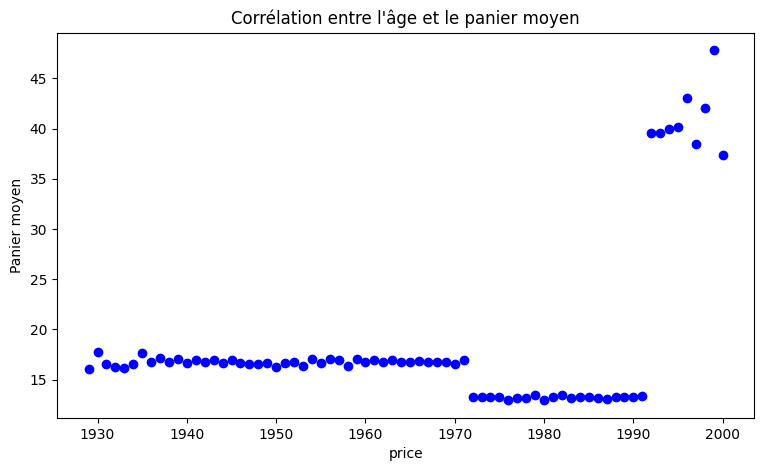

In [ ]:
plt.figure(figsize = (9, 5))
plt.xlabel("price")
plt.ylabel("Panier moyen")
plt.scatter(df_final_grpby_anne_price['birth'], df_final_grpby_anne_price['price'], c="blue")
plt.title("Corrélation entre l'âge et le panier moyen")

Il ne semble pas y avoir de corrélation évidente entre l'âge et le panier moyen. Nous allons le vérifier en effectuant le test de Spearman.

In [ ]:
# On avait déjà créé des groupes auparavant. Nous allons les réutiliser pour affiner notre analyse.

groupe1 = df_final[df_final['Categories'] == '50 ans et +']
groupe2 = df_final[df_final['Categories'] == '30-50 ans']
groupe3 = df_final[df_final['Categories'] == '20 - 30 ans']

# Nous allons maintenant les transformer en liste pour nous en servir dans nos variables.

groupe1['Categories'].tolist()


['50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans et +',
 '50 ans

# Etude de corrélation : Test de Spearman

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Exemple de données dans le DataFrame (colonnes représentent les variables)

liste_price = df_final_grpby_anne_price['price'].tolist()
liste_birth = df_final_grpby_anne_price['birth'].tolist()



# Calcul de la corrélation de Spearman entre les colonnes du DataFrame
correlation_de_spearman, _ = spearmanr(liste_price, liste_birth)

# Affichage de la matrice de corrélation de Spearman
print("Corrélation de Spearman :")
print(correlation_de_spearman)

Corrélation de Spearman :
-0.07228760692005917


In [ ]:
print("Le test résultat du test de Spearman est proche de '0' :", correlation_de_spearman, "ce qui met en avant une corrélation quasi nulle entre les deux variables 'Birth' et 'Panier moyen'.")

Le test résultat du test de Spearman est proche de '0' : -0.07228760692005917 ce qui met en avant une corrélation quasi nulle entre les deux variables 'Birth' et 'Panier moyen'.


# Etude du lien entre l'âge des clients et fréquence d’achat : Test de Pearson

Test de corrélation de Pearson :

Conditions nécessaires : Les données doivent être numériques, linéairesment corrélées et suivre une distribution normale (ou approximativement normale).
Utilisation : Le test de corrélation de Pearson est utilisé lorsque les variables sont quantitatives et qu'il est raisonnable de supposer une relation linéaire entre elles.

Les données sont bien numériques. Il nous faut vérifier si elles sont linéairement corrélées et si elles suivent uen distribution normales.

In [ ]:
df_final

,id_prod,session_id,client_id,sex,birth,price,categ,Age,Categories
0,0_1259,s_1,c_329,f,1967,11.99,0,1967,50 ans et +
1,0_1706,s_13,c_3544,f,1967,3.19,0,1967,50 ans et +
2,1_287,s_42,c_6717,m,1967,29.99,1,1967,50 ans et +
3,0_1591,s_117,c_6280,f,1967,9.99,0,1967,50 ans et +
4,1_710,s_168,c_4435,m,1967,27.94,1,1967,50 ans et +
...,...,...,...,...,...,...,...,...,...
650750,1_527,s_338025,c_8362,f,1929,19.99,1,1929,50 ans et +
650751,1_612,s_338025,c_8362,f,1929,29.55,1,1929,50 ans et +
650752,1_673,s_341834,c_577,m,1929,12.99,1,1929,50 ans et +
650753,0_1729,s_341834,c_577,m,1929,14.99,0,1929,50 ans et +


In [ ]:
# Je sépare chaque catégorie pour compter leur ligne et les comparer au .count() total

df_final_50ans_andmore = df_final[df_final['Categories'] == '50 ans et +']
df_final_30_50ans = df_final[df_final['Categories'] == '30-50 ans']
df_final_20_30ans = df_final[df_final['Categories'] == '20 - 30 ans']

In [ ]:
# Calcul du nombre de transaction, par "Catégories", puis au total.

totaltransaction_50ans_andmore = len(df_final_50ans_andmore)
totaltransaction_30_50ans = len(df_final_30_50ans)
totaltransaction_20_30ans = len(df_final_20_30ans)
totaltransaction_df_final = len(df_final)

print(totaltransaction_50ans_andmore)
print(totaltransaction_30_50ans)
print(totaltransaction_20_30ans)

print(totaltransaction_df_final)

196030
409046
45679
650755


In [ ]:
# On calcule d'abord la fréquence d'achat

frequence_achat_50ans_andmore = totaltransaction_50ans_andmore/totaltransaction_df_final
frequence_achat_30_50ans = totaltransaction_30_50ans/totaltransaction_df_final
frequence_achat_20_30ans= totaltransaction_20_30ans/totaltransaction_df_final

print(frequence_achat_50ans_andmore)
print(frequence_achat_30_50ans)
print(frequence_achat_20_30ans)

0.30123471967176585
0.6285714285714286
0.07019385175680555


In [ ]:
# Pour utiliser ces résultats dans le test de Pearson, on va les ranger dans une liste

liste_frequence_achat = [frequence_achat_50ans_andmore, frequence_achat_30_50ans, frequence_achat_20_30ans]
liste_frequence_achat


[0.30123471967176585, 0.6285714285714286, 0.07019385175680555]

In [ ]:
# J'ajoute mes fréquence à mon dataframe avant de commencer le test de pearson

liste_frequence = {'50 ans et +': 0.30123471967176585, '30-50 ans': 0.6285714285714286, '20 - 30 ans': 0.07019385175680555}

# Utilisation de la fonction map pour créer une nouvelle colonne "Valeur" basée sur la correspondance avec ma_liste
df_final["Frequence d'achat"] = df_final['Categories'].map(liste_frequence)

# Affichage du DataFrame mis à jour
df_final


,id_prod,session_id,client_id,sex,birth,price,categ,Age,Categories,Frequence d'achat
0,0_1259,s_1,c_329,f,1967,11.99,0,1967,50 ans et +,0.301235
1,0_1706,s_13,c_3544,f,1967,3.19,0,1967,50 ans et +,0.301235
2,1_287,s_42,c_6717,m,1967,29.99,1,1967,50 ans et +,0.301235
3,0_1591,s_117,c_6280,f,1967,9.99,0,1967,50 ans et +,0.301235
4,1_710,s_168,c_4435,m,1967,27.94,1,1967,50 ans et +,0.301235
...,...,...,...,...,...,...,...,...,...,...
650750,1_527,s_338025,c_8362,f,1929,19.99,1,1929,50 ans et +,0.301235
650751,1_612,s_338025,c_8362,f,1929,29.55,1,1929,50 ans et +,0.301235
650752,1_673,s_341834,c_577,m,1929,12.99,1,1929,50 ans et +,0.301235
650753,0_1729,s_341834,c_577,m,1929,14.99,0,1929,50 ans et +,0.301235


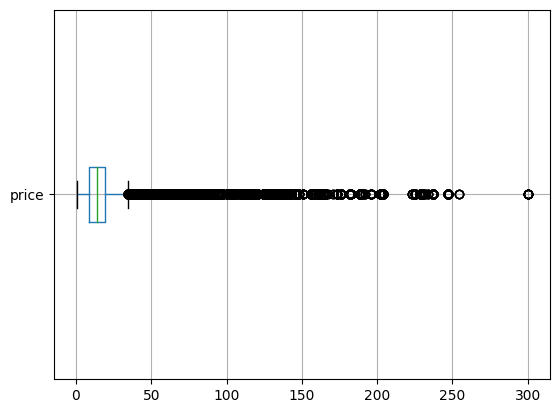

In [ ]:
# On souhaite créer la boîte à moustache pour la variable prix

df_final.boxplot(column="price", vert=False)
plt.show()

# Les cercles, au-delà des bornes de diagramme en boîte, représentent des valeurs aberrantes.
# Rappel : la valeur extrême de Q1 correspond à Q1 - 1.5*IQR et la valeur extrême de Q3 correspond à Q3 + 1.5*IQR

Text(0.5, 1.0, "Relation, entre catégorie d'âge et la fréquence d'achat")

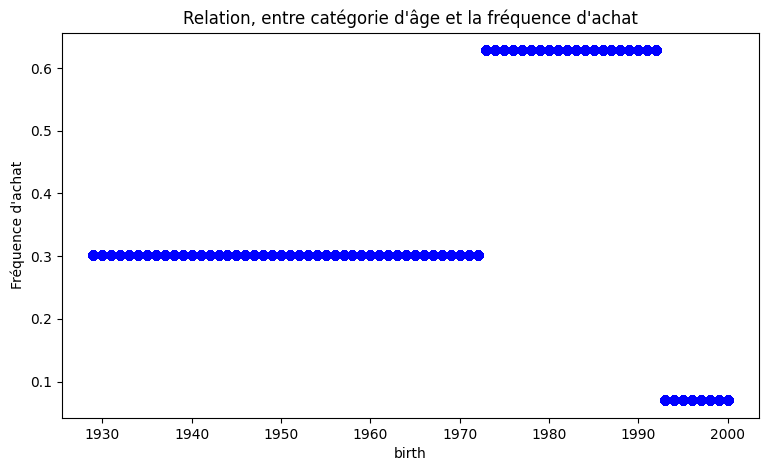

In [ ]:
plt.figure(figsize = (9, 5))
plt.xlabel("birth")
plt.ylabel("Fréquence d'achat")
plt.scatter(df_final['birth'], df_final["Frequence d'achat"], c="blue")
plt.title("Relation, entre catégorie d'âge et la fréquence d'achat")

In [ ]:
# Le test de person n'acceptent que les variables numériques continues. Comme mes catégories d'âge sont de type catégorielle. Je vais d'abord devoir pour chaque valeur unique, lui attribuer une valeur numérique.

liste_categories_numerique = {'50 ans et +': 3, '30-50 ans': 2, '20 - 30 ans': 1}

# Utilisation de la fonction map pour créer une nouvelle colonne "Valeur" basée sur la correspondance avec ma_liste
df_final["Categories_numerique"] = df_final['Categories'].map(liste_categories_numerique)

# Affichage du DataFrame mis à jour
df_final

,id_prod,session_id,client_id,sex,birth,price,categ,Age,Categories,Frequence d'achat,Categories_numerique
0,0_1259,s_1,c_329,f,1967,11.99,0,1967,50 ans et +,0.301235,3
1,0_1706,s_13,c_3544,f,1967,3.19,0,1967,50 ans et +,0.301235,3
2,1_287,s_42,c_6717,m,1967,29.99,1,1967,50 ans et +,0.301235,3
3,0_1591,s_117,c_6280,f,1967,9.99,0,1967,50 ans et +,0.301235,3
4,1_710,s_168,c_4435,m,1967,27.94,1,1967,50 ans et +,0.301235,3
...,...,...,...,...,...,...,...,...,...,...,...
650750,1_527,s_338025,c_8362,f,1929,19.99,1,1929,50 ans et +,0.301235,3
650751,1_612,s_338025,c_8362,f,1929,29.55,1,1929,50 ans et +,0.301235,3
650752,1_673,s_341834,c_577,m,1929,12.99,1,1929,50 ans et +,0.301235,3
650753,0_1729,s_341834,c_577,m,1929,14.99,0,1929,50 ans et +,0.301235,3


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650755 entries, 0 to 650754
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id_prod               650755 non-null  object  
 1   session_id            650755 non-null  object  
 2   client_id             650755 non-null  object  
 3   sex                   650755 non-null  object  
 4   birth                 650755 non-null  int64   
 5   price                 650755 non-null  float64 
 6   categ                 650755 non-null  int64   
 7   Age                   650755 non-null  int64   
 8   Categories            650755 non-null  category
 9   Frequence d'achat     650755 non-null  category
 10  Categories_numerique  650755 non-null  category
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 46.5+ MB


In [ ]:
# Calcul de la corrélation de Pearson entre les colonnes "Frequence d'achat" et "Categories"

coeff_de_correlation, p_value = pearsonr(df_final["Frequence d'achat"], df_final['Categories_numerique'])


# Affichage des résultats

print("Coefficient de corrélation de Pearson :", coeff_de_correlation)
print("Valeur de p-value) :", p_value)



# Explication
if p_value < 0.05:
    print("Il existe une corrélation significative.")
else:
    print("Il n'y a pas de corrélation significative.")



# Le test de pearson n'acceptant que des valeurs numériques continues et la variabe "Categories" ne contenant que des données catégorielles, cela conduit à une erreur.
# Possibilité de résoudre ce problème en affectant à chaque catégorie un chiffre correspondant ? (comme une clé d'identification)

Coefficient de corrélation de Pearson : -0.26069325703719953
Valeur de p-value) : 0.0
Il existe une corrélation significative.


Le test anova attend également des valeurs numériques pour fonctionner. On utilisera donc la variable Categories_numerique à la place de la variable Categories

In [ ]:
from scipy.stats import f_oneway

# anova_resultat =  Test ANOVA

liste_freq_achat = df_final["Frequence d'achat"].tolist()
liste_categ_d_age = df_final['Categories_numerique'].tolist()

# Réalisation du test ANOVA

statistique_anova, p_value = f_oneway(liste_freq_achat, liste_categ_d_age)

# Affichage des résultats
print("Statistique ANOVA :", statistique_anova)
print("Valeur p (p-value) :", p_value)

# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il existe des différences statistiquement significatives entre les groupes. Il n'y a aucun lien entre les catégories de livre et l'âge")
else:
    print("Il n'y a pas de différences statistiquement significatives entre les groupes. Il a un lien entre les catégories de livre et l'âge")


Statistique ANOVA : 5579580.020495908
Valeur p (p-value) : 0.0
Il existe des différences statistiquement significatives entre les groupes. Il n'y a aucun lien entre les catégories de livre et l'âge


In [ ]:
# On converti les varibles suivantes en valeur numérique pour qu'elle fonctionnent lors du test de bartlett.'

df_final['Categories_numerique'] = df_final['Categories_numerique'].astype(int)
df_final["Frequence d'achat"] = df_final["Frequence d'achat"].astype(int)



In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650755 entries, 0 to 650754
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id_prod               650755 non-null  object  
 1   session_id            650755 non-null  object  
 2   client_id             650755 non-null  object  
 3   sex                   650755 non-null  object  
 4   birth                 650755 non-null  int64   
 5   price                 650755 non-null  float64 
 6   categ                 650755 non-null  int64   
 7   Age                   650755 non-null  int64   
 8   Categories            650755 non-null  category
 9   Frequence d'achat     650755 non-null  int64   
 10  Categories_numerique  650755 non-null  int64   
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 55.2+ MB


# REPRENDRE ICI

In [ ]:
scipy.stats.bartlett(df_final['Categories_numerique'],df_final["Frequence d'achat"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


BartlettResult(statistic=inf, pvalue=0.0)

# faire un test anova

In [ ]:
# On peut maintenant étudier le lien entre la fréquence d'achat et l'âge des clients.

#Etude du lien entre l'âge des clients et la catégorie de livre : Test Anova


Appliquer l'anova sur les catégories d'âge qui ont été créé (ils représenteront nos échantillons)

In [ ]:
df_final

,id_prod,session_id,client_id,sex,birth,price,categ,Age,Categories,Frequence d'achat,Categories_numerique
0,0_1259,s_1,c_329,f,1967,11.99,0,1967,50 ans et +,0,3
1,0_1706,s_13,c_3544,f,1967,3.19,0,1967,50 ans et +,0,3
2,1_287,s_42,c_6717,m,1967,29.99,1,1967,50 ans et +,0,3
3,0_1591,s_117,c_6280,f,1967,9.99,0,1967,50 ans et +,0,3
4,1_710,s_168,c_4435,m,1967,27.94,1,1967,50 ans et +,0,3
...,...,...,...,...,...,...,...,...,...,...,...
650750,1_527,s_338025,c_8362,f,1929,19.99,1,1929,50 ans et +,0,3
650751,1_612,s_338025,c_8362,f,1929,29.55,1,1929,50 ans et +,0,3
650752,1_673,s_341834,c_577,m,1929,12.99,1,1929,50 ans et +,0,3
650753,0_1729,s_341834,c_577,m,1929,14.99,0,1929,50 ans et +,0,3


In [ ]:
from scipy.stats import f_oneway

# anova_resultat =  Test ANOVA

liste_birth = df_final['birth'].tolist()
liste_categ = df_final['categ'].tolist()

# Réalisation du test ANOVA

statistique_anova, p_value = f_oneway(liste_birth, liste_categ)

# Affichage des résultats
print("Statistique ANOVA :", statistique_anova)
print("Valeur p (p-value) :", p_value)

# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il existe des différences statistiquement significatives entre les groupes. Il n'y a aucun lien entre les catégories de livre et l'âge")
else:
    print("Il n'y a pas de différences statistiquement significatives entre les groupes. Il a un lien entre les catégories de livre et l'âge")



Statistique ANOVA : 15539329982.070282
Valeur p (p-value) : 0.0
Il existe des différences statistiquement significatives entre les groupes. Il n'y a aucun lien entre les catégories de livre et l'âge


In [ ]:
# faire aussi une boxplot (boîte à moustache, en affichant les catégories sur le graphique)


# Choses à faire


"Genre du client et catégorie de produits achetés.
"● Âge des clients et montant total des achats."
"● Âge des clients et fréquence d’achat.
"● Âge des clients et panier moyen.
"● Âge des clients et catégorie de produits achetés"